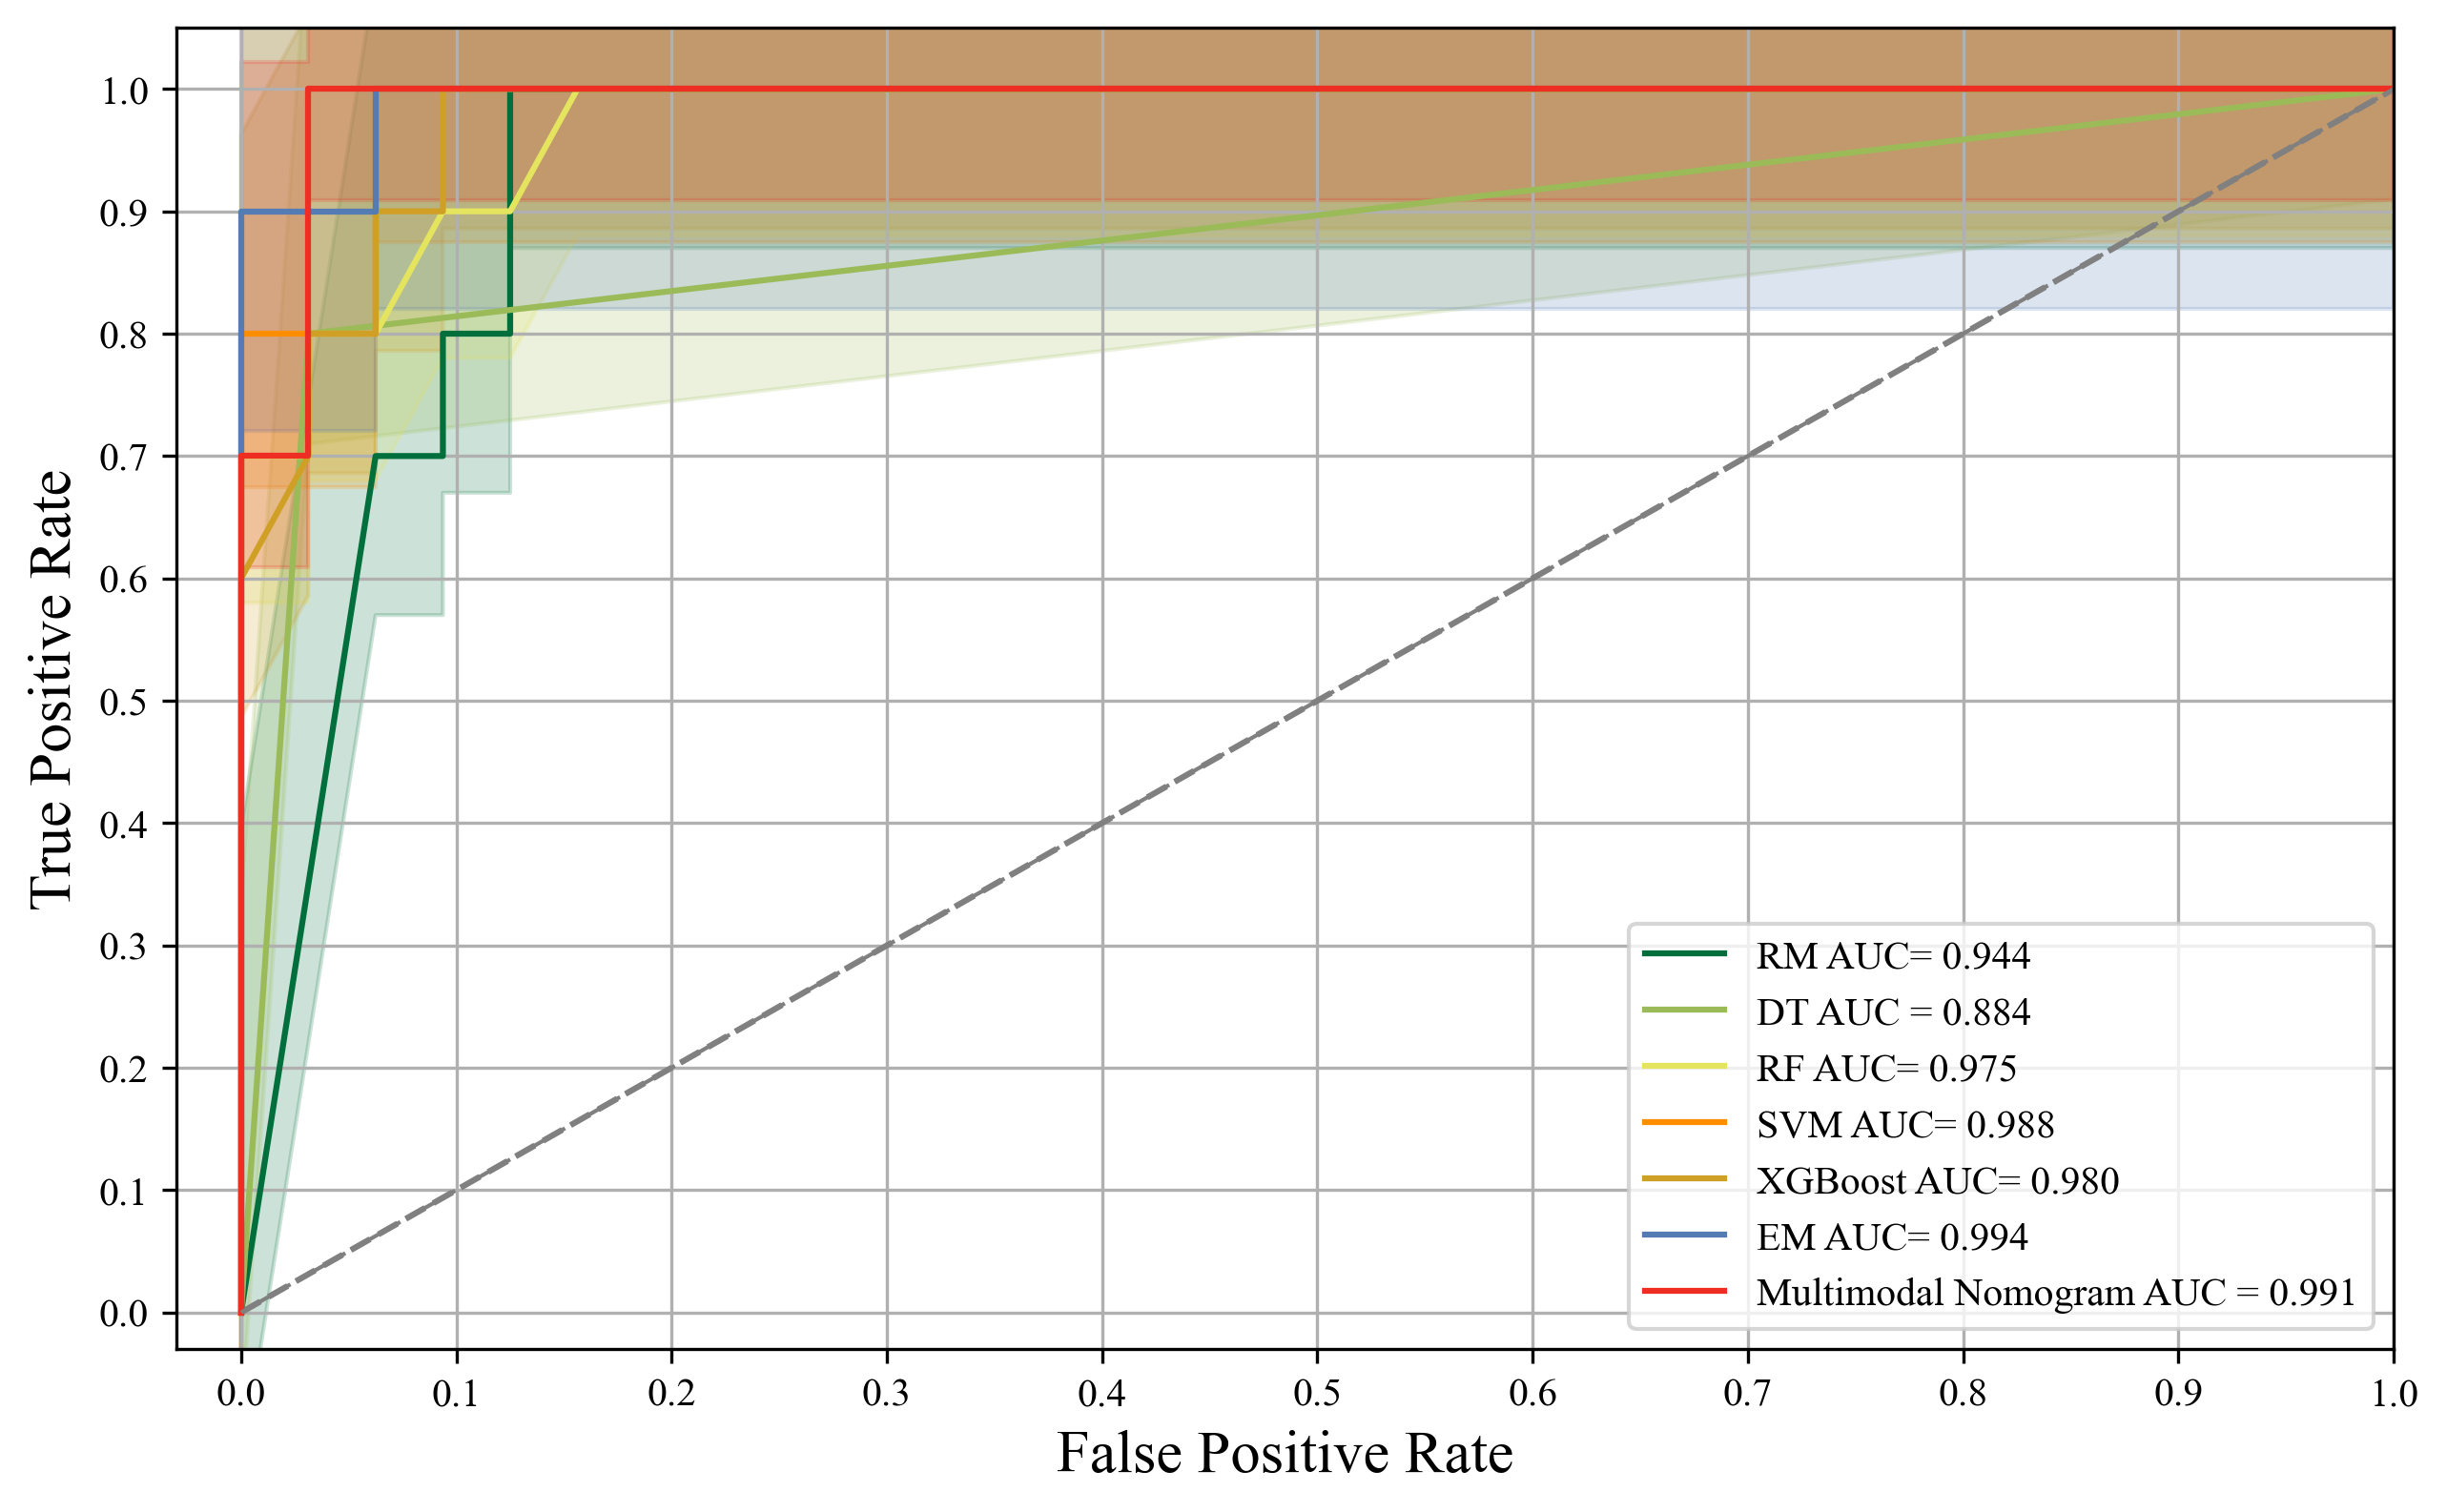

In [3]:
import matplotlib.pyplot as plt
# Plot macro-average ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
# 读取数据
train_data = pd.read_csv(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0727other-Nonomaliaze\tc1_is.csv")
train_CLA = train_data['pred_probability']
Y_train = train_data['label']

test_data = pd.read_csv(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0727other-Nonomaliaze\tc1_rm_ULR.csv")
test_CLA = test_data['pred_probability']
Y_test = test_data['label']

val_data = pd.read_excel(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0727other-Nonomaliaze\EMtotal-LHH0-0.75to0.5.xlsx")
val_CLA = val_data['pred_probability']
Y_val = val_data['label']

dt_data = pd.read_csv(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0728normalize15f\tc_dt.csv")
dt_CLA = dt_data['pred_probability']
Y_dt = dt_data['label']

rf_data = pd.read_csv(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0728normalize15f\tc_RF.csv")
rf_CLA = rf_data['pred_probability']
Y_rf = rf_data['label']

svm_data = pd.read_csv(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0728normalize15f\tc_svm.csv")
svm_CLA = svm_data['pred_probability']
Y_svm = svm_data['label']

xgb_data = pd.read_csv(r"D:\wxx\SFYdataJPG\Code\imagescore5\imagescore5\ML\0728normalize15f\tc_xgb.csv")
xgb_CLA = xgb_data['pred_probability']
Y_xgb = xgb_data['label']

def calculate_confidence_interval(data, confidence=0.95):
    mean_value = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean_value - 1.96 * (std_dev / np.sqrt(len(data)))
    upper_bound = mean_value + 1.96 * (std_dev / np.sqrt(len(data)))
    
    return lower_bound, upper_bound

# 修改阈值
# threshold = 0.5  # 举例，修改阈值为0.5

# # 重新分类样本
# train_predictions = (train_CLA >= threshold).astype(int)
# test_predictions = (test_CLA >= threshold).astype(int)
# val_predictions = (val_CLA >= threshold).astype(int)

# dt_predictions = (dt_CLA >= threshold).astype(int)
# rf_predictions = (rf_CLA >= threshold).astype(int)
# svm_predictions = (svm_CLA >= threshold).astype(int)
# xgb_predictions = (xgb_CLA >= threshold).astype(int)
# # 计算 ROC 曲线和 AUC
# # 重新计算 ROC 曲线和 AUC
# prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_CLA)
# prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_CLA)
# prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_CLA)

# prob_true_dt, prob_pred_dt, _ = roc_curve(Y_dt, dt_predictions)
# prob_true_rf, prob_pred_rf, _ = roc_curve(Y_rf, rf_predictions)
# prob_true_svm, prob_pred_svm, _ = roc_curve(Y_svm, svm_predictions)
# prob_true_xgb, prob_pred_xgb, _ = roc_curve(Y_xgb, xgb_predictions)

prob_true_train, prob_pred_train,thresholds = roc_curve(Y_train, train_CLA)
prob_true_val, prob_pred_val ,thresholds= roc_curve(Y_val, val_CLA)
prob_true_test, prob_pred_test ,thresholds= roc_curve(Y_test, test_CLA)
prob_true_dt, prob_pred_dt,thresholds= roc_curve(Y_dt, dt_CLA)
prob_true_rf, prob_pred_rf,thresholds= roc_curve(Y_rf, rf_CLA)
prob_true_svm, prob_pred_svm,thresholds = roc_curve(Y_svm, svm_CLA)
prob_true_xgb, prob_pred_xgb, thresholds = roc_curve(Y_xgb, xgb_CLA)

roc_auc_train = auc(prob_true_train, prob_pred_train)
roc_auc_val = auc(prob_true_val, prob_pred_val)
roc_auc_test = auc(prob_true_test, prob_pred_test)

roc_auc_dt = auc(prob_true_dt, prob_pred_dt)
roc_auc_rf = auc(prob_true_rf, prob_pred_rf)
roc_auc_svm = auc(prob_true_svm, prob_pred_svm)
roc_auc_xgb = auc(prob_true_xgb, prob_pred_xgb)
# 计算置信区间
conf_int_train_lower, conf_int_train_upper = calculate_confidence_interval(train_CLA)
conf_int_val_lower, conf_int_val_upper = calculate_confidence_interval(val_CLA)
conf_int_test_lower, conf_int_test_upper = calculate_confidence_interval(test_CLA)

conf_int_dt_lower, conf_int_dt_upper = calculate_confidence_interval(dt_CLA)
conf_int_rf_lower, conf_int_rf_upper = calculate_confidence_interval(rf_CLA)
conf_int_svm_lower, conf_int_svm_upper = calculate_confidence_interval(svm_CLA)
conf_int_xgb_lower, conf_int_xgb_upper = calculate_confidence_interval(xgb_CLA)
# 绘制 ROC 曲线
plt.figure(figsize=(10, 6), dpi=300)  
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为Times New Roma

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')



plt.plot(prob_true_test, prob_pred_test, label=f'RM AUC= {roc_auc_test:.3f}', color='#006F3C')
plt.fill_between(prob_true_test, prob_pred_test + conf_int_test_upper, prob_pred_test - conf_int_test_lower, color='#006F3C', alpha=0.2)




plt.plot(prob_true_dt, prob_pred_dt, label=f'DT AUC = {roc_auc_dt:.3f}', color='#9bbb59')
plt.fill_between(prob_true_dt, prob_pred_dt - conf_int_dt_lower, prob_pred_dt + conf_int_dt_upper, color='#9bbb59', alpha=0.2)

plt.plot(prob_true_rf, prob_pred_rf, label=f'RF AUC= {roc_auc_rf:.3f}', color='#E4E45F')
plt.fill_between(prob_true_rf, prob_pred_rf + conf_int_rf_upper, prob_pred_rf - conf_int_rf_lower, color='#E4E45F', alpha=0.2)

plt.plot(prob_true_svm, prob_pred_svm, label=f'SVM AUC= {roc_auc_svm:.3f}', color='#fe8d00')
plt.fill_between(prob_true_svm, prob_pred_svm + conf_int_svm_upper, prob_pred_svm - conf_int_svm_lower, color='#fe8d00', alpha=0.2)

plt.plot(prob_true_xgb, prob_pred_xgb, label=f'XGBoost AUC= {roc_auc_xgb:.3f}', color='#d0a026')
plt.fill_between(prob_true_xgb, prob_pred_xgb + conf_int_xgb_upper, prob_pred_xgb - conf_int_xgb_lower, color='#d0a026', alpha=0.2)

plt.plot(prob_true_val, prob_pred_val, label=f'EM AUC= {roc_auc_val:.3f}', color='#547BB4')
plt.fill_between(prob_true_val, prob_pred_val + conf_int_val_upper, prob_pred_val - conf_int_val_lower, color='#547BB4', alpha=0.2)

plt.plot(prob_true_train, prob_pred_train, label=f'Multimodal Nomogram AUC = {roc_auc_train:.3f}', color='#EE2E22')
plt.fill_between(prob_true_train, prob_pred_train - conf_int_train_lower, prob_pred_train + conf_int_train_upper, color='#EE2E22', alpha=0.2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim([-0.03, 1])
plt.ylim([-0.03, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Train ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.xlabel("False Positive Rate", fontdict={'fontsize': 15})  
plt.ylabel("True Positive Rate", fontdict={'fontsize': 15}) 
# plt.title('Receiver Operating Characteristic (ROC) Curve with Confidence Interval')
plt.show()

0.25625 0.76


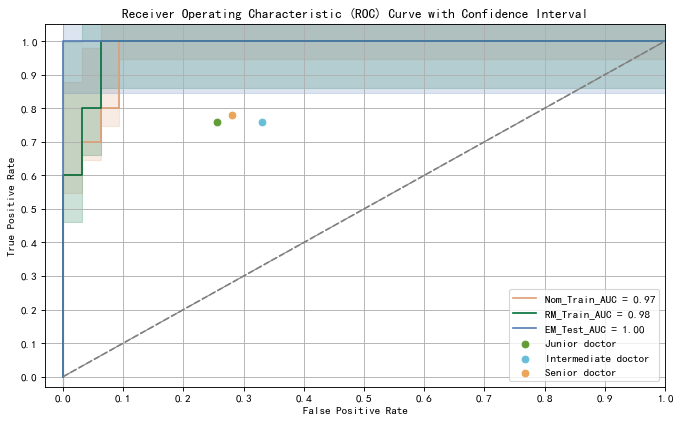

In [7]:
import matplotlib.pyplot as plt
# Plot macro-average ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
# 读取数据
train_data = pd.read_csv(r"D:/SFY/imagescore5/imagescore5/prob/tc1_is5.csv")
train_CLA = train_data['pred_probability']
Y_train = train_data['label']

test_data = pd.read_csv(r"D:/SFY/imagescore5/imagescore5/prob/tc1_rm_MLR.csv")
test_CLA = test_data['pred_probability']
Y_test = test_data['label']

val_data = pd.read_excel(r"D:/SFY/imagescore5/imagescore5/prob/EMmany-LHH0-0.75to0.5.xlsx")
val_CLA = val_data['pred_probability']
Y_val = val_data['label']

small_data = pd.read_excel(r"D:/SFY/imagescore5/imagescore5/prob/EM/EM-0.75to0.5/EM2-0.75to0.5.xlsx")
small_CLA = val_data['pred_probability']
Y_small = val_data['label']

mid_data = pd.read_excel(r"D:/SFY/imagescore5/imagescore5/prob/EM/EM-0.75to0.5/EM1-0.75to0.5.xlsx")
mid_CLA = mid_data['pred_probability']
Y_mid = mid_data['label']

big_data = pd.read_excel(r"D:/SFY/imagescore5/imagescore5/prob/EM/EM-0.75to0.5/EM3-0.75to0.5.xlsx")
big_CLA = big_data['pred_probability']
Y_big = big_data['label']

def calculate_confidence_interval(data, confidence=0.95):
    mean_value = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean_value - 1.96 * (std_dev / np.sqrt(len(data)))
    upper_bound = mean_value + 1.96 * (std_dev / np.sqrt(len(data)))
    
    return lower_bound, upper_bound

# # 修改阈值
# threshold = 0.5  # 举例，修改阈值为0.5

# # 重新分类样本
# train_predictions = (train_CLA > threshold).astype(int)
# test_predictions = (test_CLA > threshold).astype(int)
# val_predictions = (val_CLA > threshold).astype(int)

# # 计算 ROC 曲线和 AUC
# # 重新计算 ROC 曲线和 AUC
# prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_predictions)
# prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_predictions)
# prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_predictions)

# # 计算 ROC 曲线和 AUC
prob_true_train, prob_pred_train, _ = roc_curve(Y_train, train_CLA)
prob_true_val, prob_pred_val, _ = roc_curve(Y_val, val_CLA)
prob_true_test, prob_pred_test, _ = roc_curve(Y_test, test_CLA)
roc_auc_train = auc(prob_true_train, prob_pred_train)
roc_auc_val = auc(prob_true_val, prob_pred_val)
roc_auc_test = auc(prob_true_test, prob_pred_test)
# 计算置信区间
conf_int_train_lower, conf_int_train_upper = calculate_confidence_interval(train_CLA)
conf_int_val_lower, conf_int_val_upper = calculate_confidence_interval(val_CLA)
conf_int_test_lower, conf_int_test_upper = calculate_confidence_interval(test_CLA)

# average_performance = small_data.groupby('label').agg({'pred_probability': 'mean'}).reset_index()
prob_true_small, prob_pred_small,_ = roc_curve(Y_small, small_CLA)
roc_auc_small = auc(prob_true_small, prob_pred_small).mean()
prob_true_mid, prob_pred_mid, _ = roc_curve(Y_mid, mid_CLA)
roc_auc_mid = auc(prob_true_mid, prob_pred_mid).mean()
prob_true_big, prob_pred_big, _ = roc_curve(Y_big, big_CLA)
roc_auc_big = auc(prob_true_big, prob_pred_big).mean()
average_fpr_small = np.mean(prob_true_small)
average_tpr_small = np.mean(prob_pred_small)
# print(average_fpr_small,average_tpr_small)
average_fpr_mid = np.mean(prob_true_mid)
average_tpr_mid = np.mean(prob_pred_mid)

average_fpr_big = np.mean(prob_true_big)
average_tpr_big = np.mean(prob_pred_big)

# 绘制 ROC 曲线
plt.figure(figsize=(10, 6), dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(prob_true_train, prob_pred_train, label=f'Nom_Train_AUC = {roc_auc_train:.2f}', color='#DD9F75')
plt.fill_between(prob_true_train, prob_pred_train - conf_int_train_lower, prob_pred_train + conf_int_train_upper, color='#DD9F75', alpha=0.2)

plt.plot(prob_true_test, prob_pred_test, label=f'RM_Train_AUC = {roc_auc_test:.2f}', color='#006F3C')
plt.fill_between(prob_true_test, prob_pred_test + conf_int_test_upper, prob_pred_test - conf_int_test_lower, color='#006F3C', alpha=0.2)

plt.plot(prob_true_val, prob_pred_val, label=f'EM_Test_AUC = {roc_auc_val:.2f}', color='#547BB4')
plt.fill_between(prob_true_val, prob_pred_val + conf_int_val_upper, prob_pred_val - conf_int_val_lower, color='#547BB4', alpha=0.2)

# 创建包含 AUC 值的 DataFrame
average_performance_df = pd.DataFrame({'label': ['Average Performance'], 'pred_probability': [roc_auc_small]})
plt.xticks([])
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim([-0.03, 1])
plt.ylim([-0.03, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tain ROC Curve')
# 在现有画布上添加散点图

## plt.scatter(roc_auc_small['label'], roc_auc_small['pred_probability'], marker='o', color='green', label='Average Performance')
# plt.scatter(average_fpr_small, average_tpr_small, marker='o', color='#629C35', label=f'Junior doctor= {roc_auc_small:.2f}')
# plt.scatter(average_fpr_mid, average_tpr_mid, marker='o', color='#68BED9', label=f'Intermediate doctor= {roc_auc_mid:.2f}')
# plt.scatter(average_fpr_big, average_tpr_big, marker='o', color='#EAA558', label=f'Senior doctor= {roc_auc_big:.2f}')
plt.scatter(average_fpr_small, average_tpr_small, marker='o', color='#629C35', label='Junior doctor')
plt.scatter(average_fpr_mid, average_tpr_mid, marker='o', color='#68BED9', label='Intermediate doctor')
plt.scatter(average_fpr_big, average_tpr_big, marker='o', color='#EAA558', label='Senior doctor')

plt.legend(loc='lower right')
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC) Curve with Confidence Interval')
plt.show()